In [44]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from queue import PriorityQueue
import math

In [45]:
def create_graph_from_csv(file_name):
    return nx.from_pandas_edgelist(pd.read_csv(file_name), 'Origin', 'Destination', ['Distance'], create_using=nx.DiGraph)

In [46]:
def visualize_graph(graph, visited_nodes_sequence):
    for step, visited_nodes in enumerate(visited_nodes_sequence):
        subgraph = graph.subgraph(visited_nodes)
        pos = nx.spring_layout(graph)
        nx.draw(subgraph, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=8, font_color='black')

        # Display edge labels with distances for edges in the current subgraph
        labels = {edge: graph[edge[0]][edge[1]]['Distance'] for edge in subgraph.edges()}
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)

        # Display the number of nodes traced
        print(f"Step {step + 1}: Traced {len(visited_nodes)} nodes")

        plt.title(f"Step {step + 1}")
        plt.show()

In [47]:
def euclidean_distance(node1, node2, pos):
    x1, y1 = pos[node1]
    x2, y2 = pos[node2]
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [48]:
def a_star(graph, start, goal, heuristic):
    visited = set()
    pos = nx.spring_layout(graph)  # Calculate node positions before A* algorithm
    priority_queue = PriorityQueue()
    priority_queue.put((0 + heuristic(start, goal, pos), start, [start], 0))  # f = g + h

    visited_nodes_sequence = []

    while not priority_queue.empty():
        _, current_vertex, path, cost = priority_queue.get()

        visited_nodes_sequence.append(set(path))

        if current_vertex == goal:
            # Display the number of nodes traced by A*
            print("\n=================================================================\n")
            print(f"Nodes traced by A*: {len(visited_nodes_sequence[-1])}")
            print("Path from (A*) {} to {}: {}".format(start, goal, ' -> '.join(path)))
            print("Total cost: {}".format(cost))
            print("\n=================================================================\n")
            visualize_graph(graph, visited_nodes_sequence)
            return

        if current_vertex not in visited:
            visited.add(current_vertex)
            neighbors = graph.neighbors(current_vertex)
            for neighbor in neighbors:
                if neighbor not in visited:
                    new_cost = cost + graph[current_vertex][neighbor]['Distance']
                    priority_queue.put((new_cost + heuristic(neighbor, goal, pos), neighbor, path + [neighbor], new_cost))

    print("No path found from {} to {}.".format(start, goal))

In [57]:
def main():
  file_name = 'indian-cities-dataset.csv'
  graph = create_graph_from_csv(file_name)

  start_vertex = input("Enter the starting vertex: ").strip().capitalize()
  goal_vertex = input("Enter the goal vertex: ").strip().capitalize()

  a_star(graph, start_vertex, goal_vertex, euclidean_distance)

Enter the starting vertex:      agra
Enter the goal vertex:     mumbai    


Nodes traced by A*: 3
Path from (A*) Agra to Mumbai: Agra -> Delhi -> Mumbai
Total cost: 1692


Step 1: Traced 1 nodes


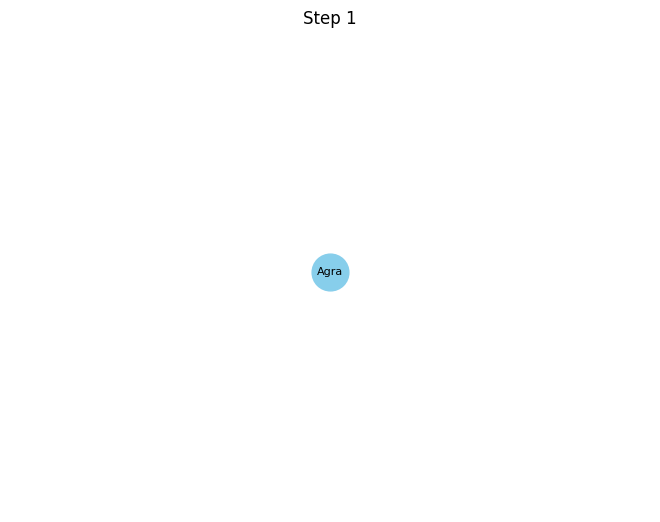

Step 2: Traced 2 nodes


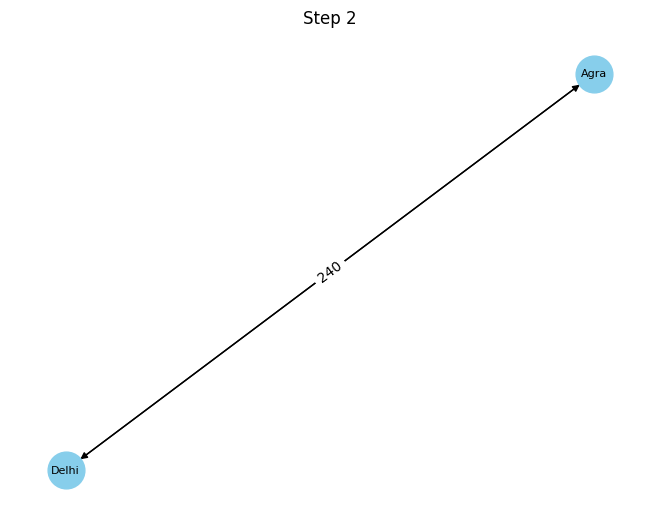

Step 3: Traced 2 nodes


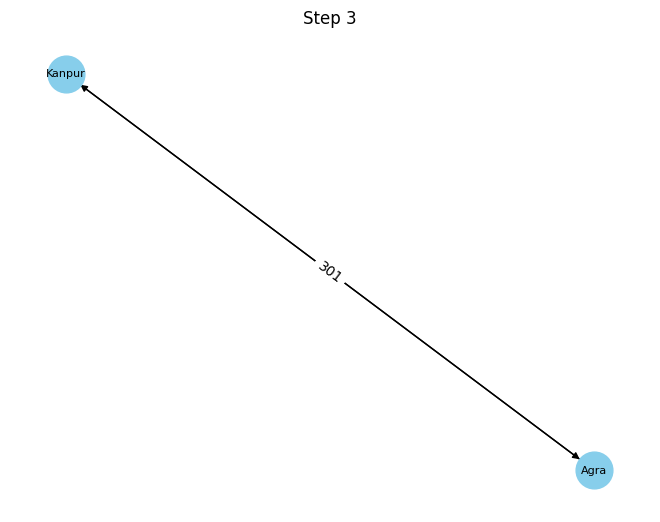

Step 4: Traced 2 nodes


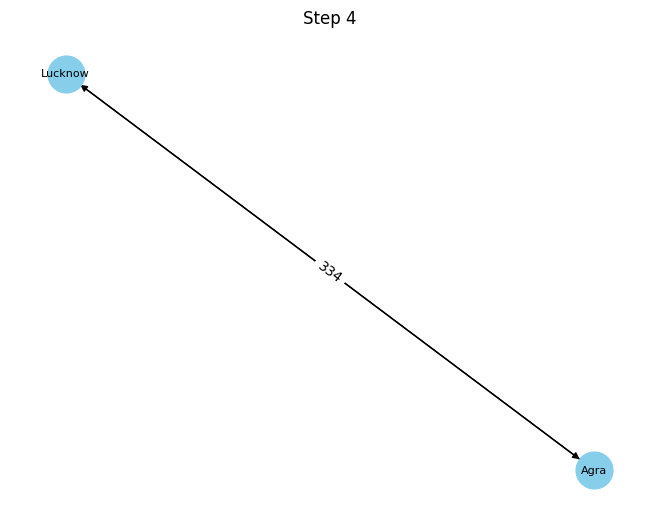

Step 5: Traced 3 nodes


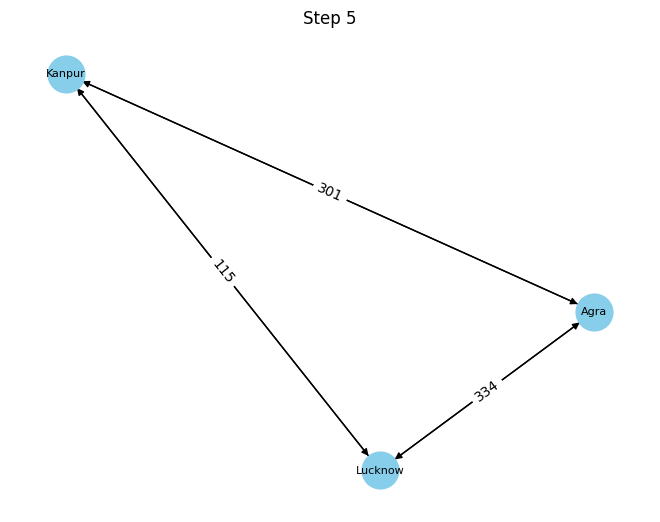

Step 6: Traced 3 nodes


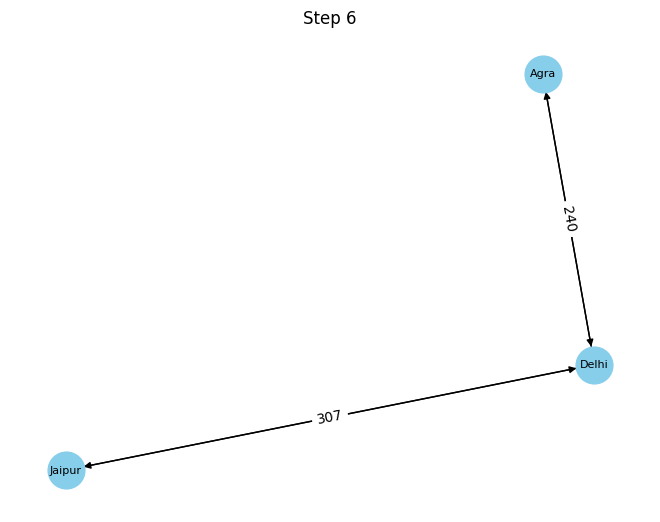

Step 7: Traced 3 nodes


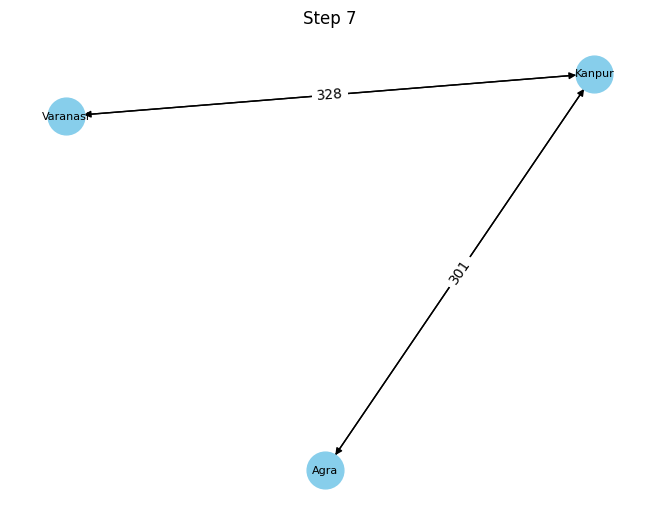

Step 8: Traced 3 nodes


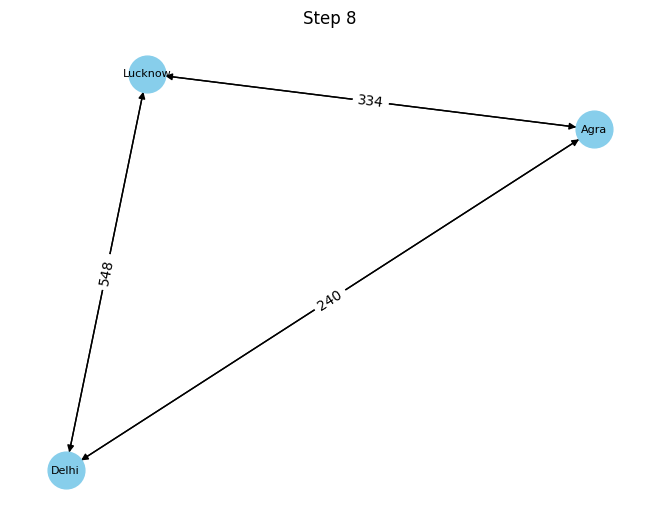

Step 9: Traced 4 nodes


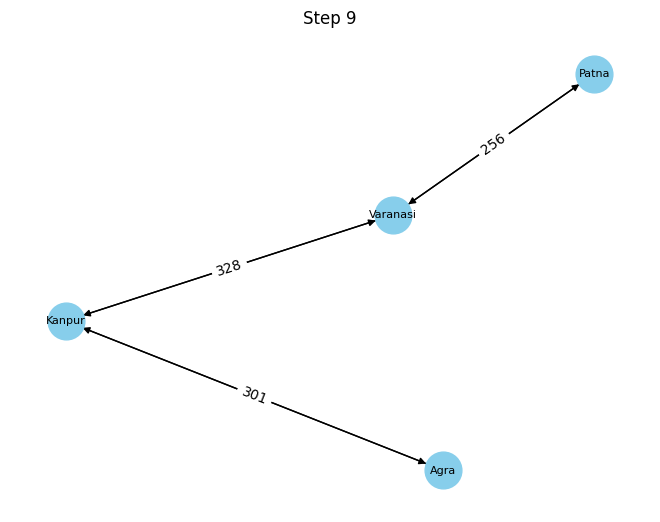

Step 10: Traced 4 nodes


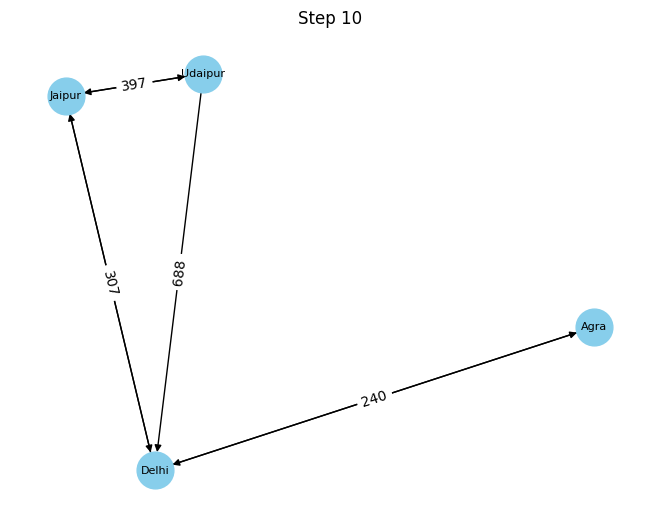

Step 11: Traced 5 nodes


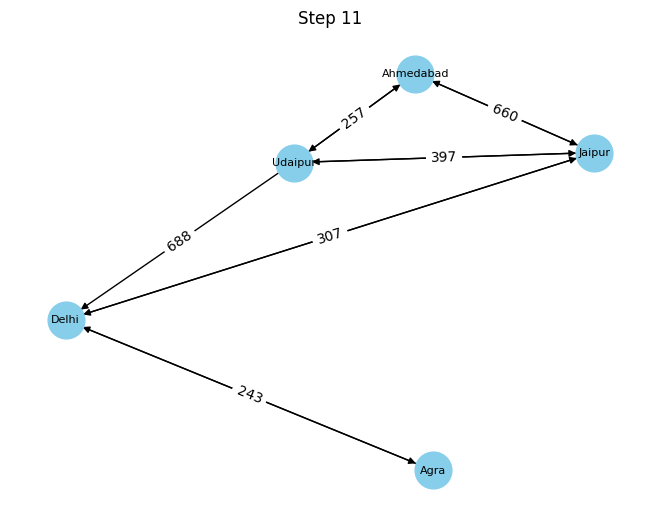

Step 12: Traced 4 nodes


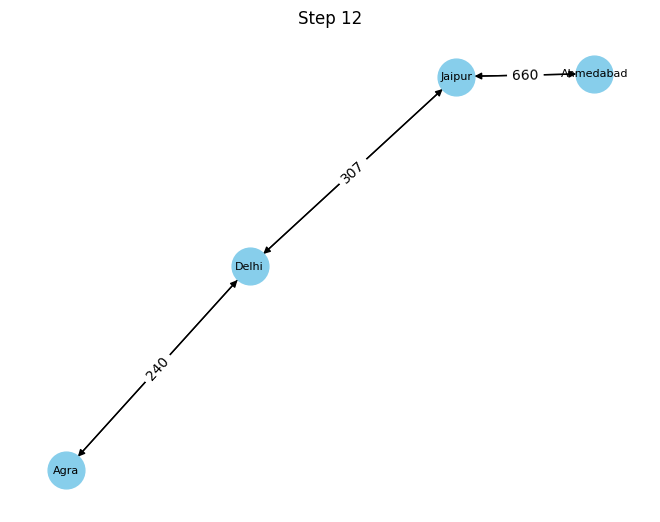

Step 13: Traced 4 nodes


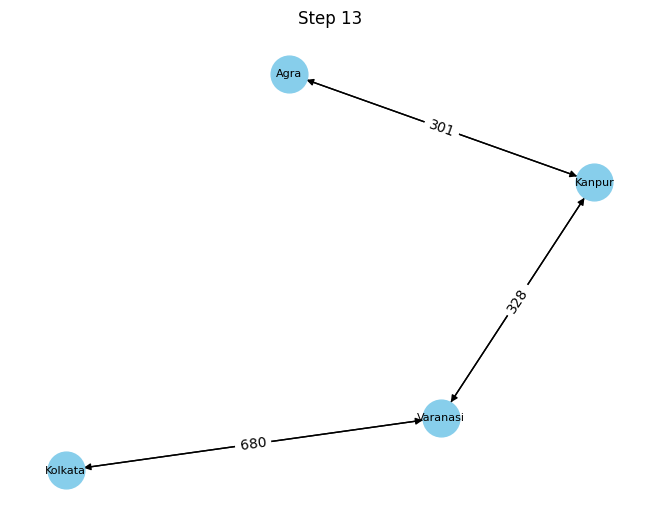

Step 14: Traced 5 nodes


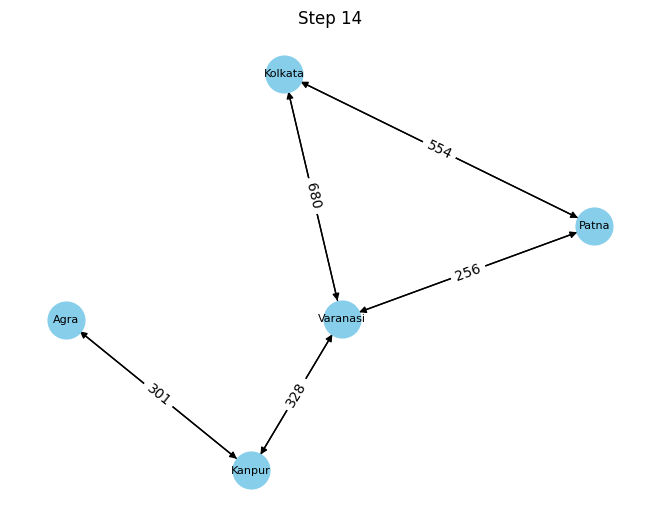

Step 15: Traced 3 nodes


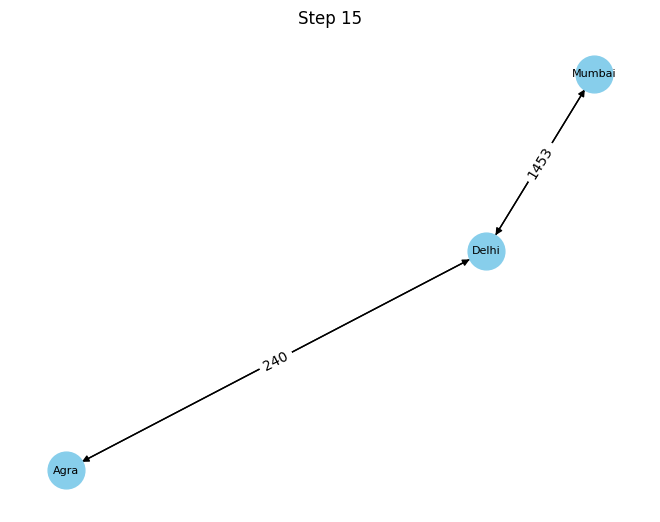

In [60]:
if __name__ == "__main__":
    main()